In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 25 
BATCH_SIZE = 1024 

In [14]:
"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.25, 0.5, 0.75]
reduce_lr_patient = [1, 5, 10]

In [20]:
from keras.callbacks import ReduceLROnPlateau
results = {}
results = {}
"""
Set your training loop
"""
for fac, pat in itertools.product(reduce_lr_factor, reduce_lr_patient):
    reduce_lr = ReduceLROnPlateau(factor=fac,
                                  min_lr=1e-12,
                                  monitor='val_loss',
                                  patience=pat,
                                  verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "factor-%s-patience-%s" % (str(fac), str(pat))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512 

50000/50000 [==============================] - 5s 94us/step - loss: 1.3061 - accuracy: 0.5408 - val_loss: 1.7014 - val_accuracy: 0.3906
Epoch 5/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.2399 - accuracy: 0.5622 - val_loss: 1.7712 - val_accuracy: 0.3734
Epoch 6/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.1961 - accuracy: 0.5779 - val_loss: 1.8600 - val_accuracy: 0.3549
Epoch 7/25
50000/50000 [==============================] - 4s 89us/step - loss: 1.1391 - accuracy: 0.5983 - val_loss: 1.9429 - val_accuracy: 0.3484
Epoch 8/25
50000/50000 [==============================] - 5s 91us/step - loss: 1.0925 - accuracy: 0.6154 - val_loss: 1.8929 - val_accuracy: 0.3726

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 9/25
50000/50000 [==============================] - 5s 97us/step - loss: 0.9718 - accuracy: 0.6635 - val_loss: 1.4960 - val_accuracy: 0.4720
Epoch 10/25
50000/50000 [=======================

50000/50000 [==============================] - 5s 92us/step - loss: 0.4369 - accuracy: 0.8699 - val_loss: 1.5837 - val_accuracy: 0.5062
Epoch 23/25
50000/50000 [==============================] - 5s 92us/step - loss: 0.4181 - accuracy: 0.8773 - val_loss: 1.5898 - val_accuracy: 0.5084
Epoch 24/25
50000/50000 [==============================] - 5s 96us/step - loss: 0.3978 - accuracy: 0.8851 - val_loss: 1.5770 - val_accuracy: 0.5148
Epoch 25/25
50000/50000 [==============================] - 5s 103us/step - loss: 0.3780 - accuracy: 0.8932 - val_loss: 1.5947 - val_accuracy: 0.5077
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 105us/step - loss: 1.7645 - accuracy: 0.3893 - val_loss: 2.1870 - val_accuracy: 0.2362
Epoch 2/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.4904 - accuracy: 0.4766 - val_loss: 2.0039 - val_accuracy: 0.3138
Epoch 3/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.3946 - accuracy: 0.5074 - val_loss: 1.9006 - val_accuracy: 0.3242
Epoch 4/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.3218 - accuracy: 0.5327 - val_loss: 2.0555 - val_accuracy: 0.2998
Epoch 5/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.2575 - accuracy: 0.5563 - val_loss: 1.7225 - val_accuracy: 0.3823
Epoch 6/25
50000/50000 [==============================] - 5s 96us/step - loss: 1.1945 - accuracy: 0.5786 - val_loss: 1.6837 - val_accuracy: 0.4016
Epoch 7/25
50000/50000 [==============================] - 5s 99us/s

50000/50000 [==============================] - 5s 97us/step - loss: 0.5652 - accuracy: 0.8136 - val_loss: 1.6459 - val_accuracy: 0.4844
Epoch 20/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.5387 - accuracy: 0.8240 - val_loss: 1.7056 - val_accuracy: 0.4841
Epoch 21/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.5168 - accuracy: 0.8297 - val_loss: 1.7218 - val_accuracy: 0.4754
Epoch 22/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.4854 - accuracy: 0.8435 - val_loss: 1.8345 - val_accuracy: 0.4759
Epoch 23/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.4513 - accuracy: 0.8566 - val_loss: 1.7271 - val_accuracy: 0.4886
Epoch 24/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.4303 - accuracy: 0.8620 - val_loss: 1.7422 - val_accuracy: 0.4987
Epoch 25/25
50000/50000 [==============================] - 5s 94us/step - loss: 0.4034 - accuracy: 0.8749 - val_loss: 1.8189

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 5s 101us/step - loss: 1.7695 - accuracy: 0.3890 - val_loss: 3.0138 - val_accuracy: 0.1627
Epoch 2/25
50000/50000 [==============================] - 5s 95us/step - loss: 1.4968 - accuracy: 0.4745 - val_loss: 1.8017 - val_accuracy: 0.3561
Epoch 3/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.3959 - accuracy: 0.5092 - val_loss: 1.9079 - val_accuracy: 0.3241
Epoch 4/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.3171 - accuracy: 0.5367 - val_loss: 1.7285 - val_accuracy: 0.3887
Epoch 5/25
50000/50000 [==============================] - 5s 94us/step - loss: 1.2537 - accuracy: 0.5579 - val_loss: 1.8865 - val_accuracy: 0.3517
Epoch 6/25
50000/50000 [==============================] - 5s 97us/step - loss: 1.1954 - accuracy: 0.5779 - val_loss: 1.7900 - val_accuracy: 0.3925
Epoch 7/25
50000/50000 [==============================] - 5s 94us/s

50000/50000 [==============================] - 5s 108us/step - loss: 0.6403 - accuracy: 0.7808 - val_loss: 1.8534 - val_accuracy: 0.4324
Epoch 20/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.5954 - accuracy: 0.7974 - val_loss: 1.7942 - val_accuracy: 0.4511
Epoch 21/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.5597 - accuracy: 0.8125 - val_loss: 2.0171 - val_accuracy: 0.4176
Epoch 22/25
50000/50000 [==============================] - 5s 95us/step - loss: 0.5358 - accuracy: 0.8188 - val_loss: 2.0144 - val_accuracy: 0.4344
Epoch 23/25
50000/50000 [==============================] - 5s 104us/step - loss: 0.5041 - accuracy: 0.8308 - val_loss: 1.9436 - val_accuracy: 0.4547
Epoch 24/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.4807 - accuracy: 0.8394 - val_loss: 1.9759 - val_accuracy: 0.4469
Epoch 25/25
50000/50000 [==============================] - 5s 101us/step - loss: 0.4487 - accuracy: 0.8519 - val_loss: 

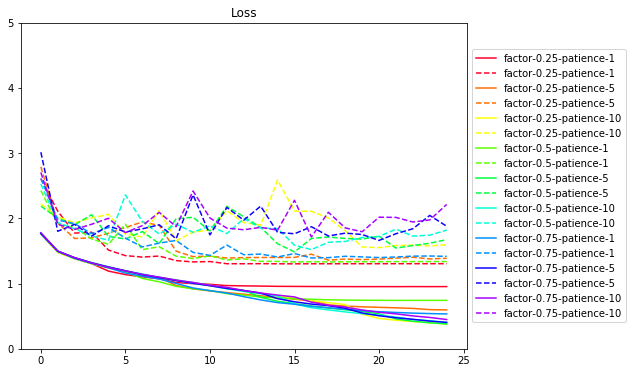

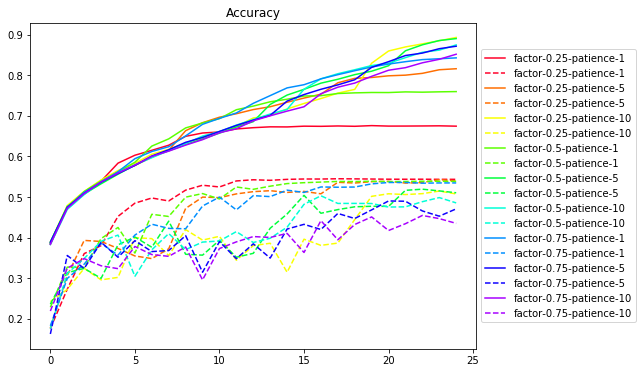

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
plot the results
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()